# TCCM school - Multiscale, Machine Learning and QSAR methods applied to biomolecules

## Convolutional Neural Network Homework with Keras

Model and train a network that classifies MNIST images with at least an accuracy of 95%.

see https://github.com/so07/TCCM-DL-2022/blob/main/keras-02-mnist.ipynb for example.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

Download MNIST dataset with Keras utilities:

In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# use only a subset of MNIST images
num_samples = 30000
train_images = train_images[:num_samples,...]
train_labels = train_labels[:num_samples]

In [4]:
print("Train dataset has shape", train_images.shape, "and type", train_images.dtype)
print("Test dataset has shape", test_images.shape, "and type", test_images.dtype)

Train dataset has shape (30000, 28, 28) and type uint8
Test dataset has shape (10000, 28, 28) and type uint8


## Prepare dataset

The images in MNIST dataset are stored as array of integer with value between 0 and 255. \
Neural network layers work on float, thus we need to cast the input to `float32` type. \
It is also convenient, for convergency reasons, to normalize the input range values between [0, 1].

In [5]:
x_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
x_test = test_images.reshape(test_images.shape[0], 28, 28, 1)

# normalize images
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

### Build categorical matrices

In the case of labels we have an array 1D with the value of the label.
Instead we should represent labels as categorical matrix,
for each images we should have an array of 10 different classes with the probability for each classes. \
In the case of target for each images
we have an array of 10 elements with 1 on the right label and 0 otherwise.


In [6]:
train_labels

array([5, 0, 4, ..., 6, 7, 1], dtype=uint8)

In [7]:
import tensorflow.keras.utils as np_utils

# convert 1-dimensional class arrays to 10-dimensional class matrices
y_train = np_utils.to_categorical(train_labels, num_classes=10)
y_test = np_utils.to_categorical(test_labels, num_classes=10)

In [8]:
y_train[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Build model

Use Convolutional, Pooling, Dropout layers to build a model that recognize the MNIST digits.
Use Sequential class and groups a linear stack of layers.
Remember to use a dense output layer with 10 nodes and a `softmax` activation function.

In [9]:
input_shape = (28, 28, 1)

model = Sequential()

# insert layers here
#
# ...
#

model.add(Dense(10, activation="softmax"))

In [10]:
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
____________________________________________________

Train the model using `fit` function. 
At least 10 epochs should be sufficient to achieve good results.

In [12]:
model.fit(
    # insert args here 
    # ...
    batch_size=???, 
    epochs=???,
    verbose=2);

Epoch 1/10


2022-09-27 09:21:07.716659: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 11.0.194, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


188/188 - 4s - loss: 0.6190 - accuracy: 0.8298 - val_loss: 0.2941 - val_accuracy: 0.9168 - 4s/epoch - 20ms/step
Epoch 2/10
188/188 - 1s - loss: 0.2674 - accuracy: 0.9205 - val_loss: 0.2159 - val_accuracy: 0.9390 - 1s/epoch - 5ms/step
Epoch 3/10
188/188 - 1s - loss: 0.1993 - accuracy: 0.9426 - val_loss: 0.1694 - val_accuracy: 0.9520 - 919ms/epoch - 5ms/step
Epoch 4/10
188/188 - 1s - loss: 0.1616 - accuracy: 0.9536 - val_loss: 0.1409 - val_accuracy: 0.9608 - 955ms/epoch - 5ms/step
Epoch 5/10
188/188 - 1s - loss: 0.1423 - accuracy: 0.9579 - val_loss: 0.1294 - val_accuracy: 0.9652 - 1s/epoch - 6ms/step
Epoch 6/10
188/188 - 1s - loss: 0.1283 - accuracy: 0.9634 - val_loss: 0.1170 - val_accuracy: 0.9665 - 1s/epoch - 5ms/step
Epoch 7/10
188/188 - 1s - loss: 0.1150 - accuracy: 0.9664 - val_loss: 0.1062 - val_accuracy: 0.9712 - 920ms/epoch - 5ms/step
Epoch 8/10
188/188 - 1s - loss: 0.1069 - accuracy: 0.9683 - val_loss: 0.1001 - val_accuracy: 0.9720 - 928ms/epoch - 5ms/step
Epoch 9/10
188/188 - 1

Optionally you can control the training process plotting the loss function and the accuracy for training and validation.

In [13]:
def plot_model_history(model):
    
    # get history from the model
    h = model.history.history

    plt.figure(figsize=(15, 5))

    # accuracy plot
    plt.subplot(121)
    plt.title("Accuracy")
    plt.plot(h['accuracy'], label="train")
    plt.plot(h['val_accuracy'], label="validate")
    plt.xlabel("Epoch")
    plt.ylabel("accuracy")
    plt.legend()

    # loss plot
    plt.subplot(122)
    plt.title("Loss")
    plt.plot(h['loss'], label="train")
    plt.plot(h['val_loss'], label="validate")
    plt.xlabel("Epoch")
    plt.ylabel("loss")
    plt.legend()

    plt.show()

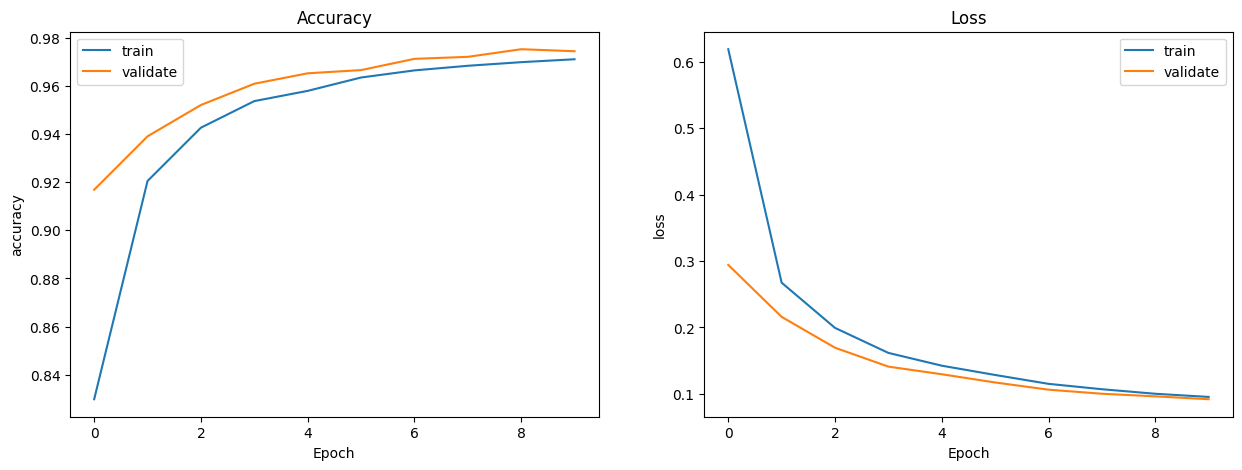

In [14]:
plot_model_history(model)

Once your model has been trained, let's evaluate its score on data not used during traing. \
The `evaluate` method returns a list of two element:
the first is the **loss**, the second is the metrics values for the model, in this case the **accuracy**.

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (score[1]*100))